In [8]:
import cmdstanpy
from cmdstanpy import CmdStanModel

In [2]:
%load_ext cmdstanjupyter

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

In [4]:
df=pd.read_csv("../Data/data-salary.txt")
df.head()

,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


In [5]:
%%stan linear_model
data {
    int N;
    real X[N];
    real Y[N];
}

parameters {
    real a;
    real b;
    real<lower=0> sigma;
}

transformed parameters {
  real y_base[N];
  for (n in 1:N)
    y_base[n]=a +b*X[n];
}

model {
    for (n in 1:N)
        Y[n] ~ normal(y_base[n],sigma);
}

INFO:cmdstanjupyter:Writing model to .stan/linear_model.stan
INFO:cmdstanjupyter:Creating CmdStanPy model & assigning it to variable "linear_model"
INFO:cmdstanpy:compiling stan program, exe file: /home/takato/NoteBook/stan/pr_cmdstan/NoteBook/.stan/linear_model
INFO:cmdstanpy:compiler options: stanc_options={}, cpp_options={}
INFO:cmdstanpy:compiled model file: /home/takato/NoteBook/stan/pr_cmdstan/NoteBook/.stan/linear_model
INFO:cmdstanjupyter:StanModel now available as variable "linear_model"!
 Compilation took 19 seconds.


In [9]:
type(linear_model)

cmdstanpy.model.CmdStanModel

In [13]:
len(df)

20

In [12]:
{"X":df["X"].values, "Y":df["Y"].values}

{'X': array([24, 24, 26, 32, 33, 35, 38, 40, 40, 43, 43, 44, 48, 52, 56, 56, 57,
        58, 59, 59]),
 'Y': array([ 472,  403,  454,  575,  546,  781,  750,  601,  814,  792,  745,
         837,  868,  988, 1092, 1007, 1233, 1202, 1123, 1314])}

In [27]:
data={"N":len(df),"X":df["X"].values, "Y":df["Y"].values}
fit=linear_model.sample(data=data
                        ,seed=1234,iter_warmup=1000,iter_sampling=2000)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


In [15]:
print(fit)

CmdStanMCMC: model=linear_model chains=4['method=sample', 'num_samples=2000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmpf528dxnq/linear_model-202109261656-1-tf4_rdow.csv
	/tmp/tmpf528dxnq/linear_model-202109261656-2-3n66wffi.csv
	/tmp/tmpf528dxnq/linear_model-202109261656-3-4ct_nvx9.csv
	/tmp/tmpf528dxnq/linear_model-202109261656-4-jact42p3.csv
 output_files:
	/tmp/tmpf528dxnq/linear_model-202109261656-1-tf4_rdow-stdout.txt
	/tmp/tmpf528dxnq/linear_model-202109261656-2-3n66wffi-stdout.txt
	/tmp/tmpf528dxnq/linear_model-202109261656-3-4ct_nvx9-stdout.txt
	/tmp/tmpf528dxnq/linear_model-202109261656-4-jact42p3-stdout.txt


In [16]:
fit.draws().shape

(2000, 4, 10)

In [17]:
fit.diagnose()

INFO:cmdstanpy:Processing csv files: /tmp/tmpf528dxnq/linear_model-202109261656-1-tf4_rdow.csv, /tmp/tmpf528dxnq/linear_model-202109261656-2-3n66wffi.csv, /tmp/tmpf528dxnq/linear_model-202109261656-3-4ct_nvx9.csv, /tmp/tmpf528dxnq/linear_model-202109261656-4-jact42p3.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


'Processing csv files: /tmp/tmpf528dxnq/linear_model-202109261656-1-tf4_rdow.csv, /tmp/tmpf528dxnq/linear_model-202109261656-2-3n66wffi.csv, /tmp/tmpf528dxnq/linear_model-202109261656-3-4ct_nvx9.csv, /tmp/tmpf528dxnq/linear_model-202109261656-4-jact42p3.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.'

In [18]:
fit.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,a,b,sigma
0,-93.9407,0.981987,0.154738,4.0,23.0,0.0,95.3211,-136.2850,22.0496,108.6990
1,-94.3605,0.999467,0.154738,2.0,7.0,0.0,94.7077,-127.9440,22.1198,114.3760
2,-92.6995,0.967821,0.154738,4.0,15.0,0.0,95.0824,-87.8979,21.0916,92.2173
3,-93.6201,0.909495,0.154738,2.0,7.0,0.0,94.1165,-72.2284,21.3577,98.1900
4,-93.3267,0.866776,0.154738,2.0,3.0,0.0,95.4013,-95.1777,21.0446,99.0874
...,...,...,...,...,...,...,...,...,...,...
7995,-93.2884,0.967646,0.160880,4.0,15.0,0.0,93.4914,-20.7890,20.0305,80.1197
7996,-92.6918,0.970580,0.160880,3.0,11.0,0.0,94.7299,-49.1289,20.5201,83.9617
7997,-92.9197,0.988355,0.160880,4.0,15.0,0.0,93.2096,-32.6594,20.1071,76.5865
7998,-92.3539,0.999629,0.160880,5.0,31.0,0.0,93.5862,-166.3760,22.8840,83.2647


In [20]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-94.0,0.030,1.4,-96.0,-93.0,-92.0,2000.0,3100.0,1.0
a,-120.0,1.400,74.0,-240.0,-120.0,1.5,2700.0,4200.0,1.0
b,22.0,0.032,1.7,19.0,22.0,25.0,2700.0,4200.0,1.0
sigma,85.0,0.310,16.0,63.0,83.0,120.0,2800.0,4300.0,1.0


In [25]:
a=fit.summary().loc["a","Mean"]
b=fit.summary().loc["b","Mean"]
y_pred=a+b*df["X"]

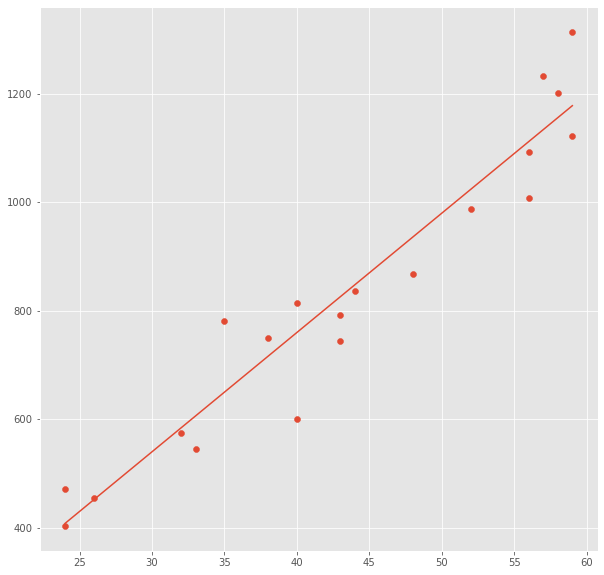

In [26]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(df["X"], df["Y"])
ax.plot(df["X"],y_pred)

In [29]:

fit=linear_model.variational(data=data,seed=1234)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [33]:
param=fit.stan_variables()
a2=param["a"]

In [34]:
y_pred2=param["a"]+param["b"]*df["X"]

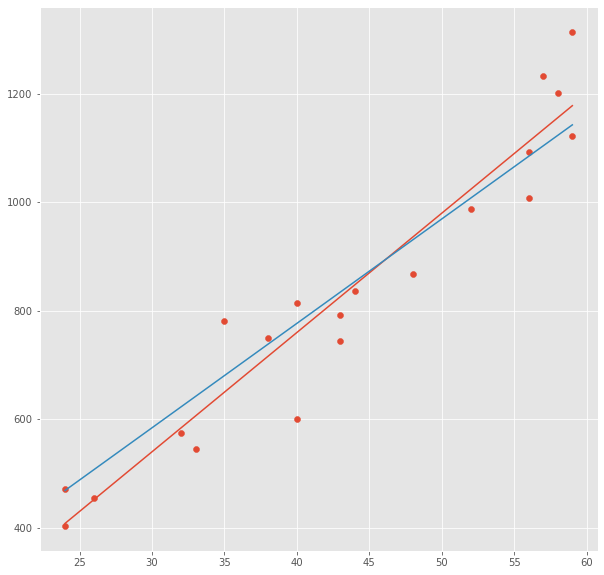

In [35]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(df["X"], df["Y"])
ax.plot(df["X"],y_pred)
ax.plot(df["X"],y_pred2)